# plot

> Provide generic plotting functionality

In [ ]:
#| default_exp plot

In [ ]:
#| hide
from nbdev.showdoc import *
import numpy as np

We want to provide a generic plotting function that standardizes plotting of any data. Therefore, we take in a function that provides a list of args and kwargs and plots them through matplotlib. For instance, plotting a sin wave:

In [ ]:
#| export
from PIL import Image
import io
import matplotlib.pyplot as plt

default_kwargs = {"linewidth": 4}

def mpl_wrapper(
    plot_list: list[tuple[list, dict]], # a two-element tuple containing (args, kwargs) to pass to matplotlib's `plot` function.
    xlabel: str=None, # X axis label
    ylabel: str=None # Y axis label
) -> Image.Image:
    """
    Matplotlib wrapper function. Provides a default plot style given data to plot.
    Returns a PIL image containing the plot.
    """
    buf = io.BytesIO() # for saving the image

    # plot the traces
    fig, ax = plt.subplots(figsize=(5, 5))
    for trace_specs in plot_list:
        args, kwargs = trace_specs
        kwargs = default_kwargs | kwargs
        plt.plot(*args, **kwargs)

    # axis labels
    if xlabel: plt.xlabel(xlabel, fontsize=20)
    if ylabel: plt.ylabel(ylabel, fontsize=20)

    # tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)

    # save the image
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0) # rewind buffer's file pointer to the beginning.

    plt.close()
    return Image.open(buf)

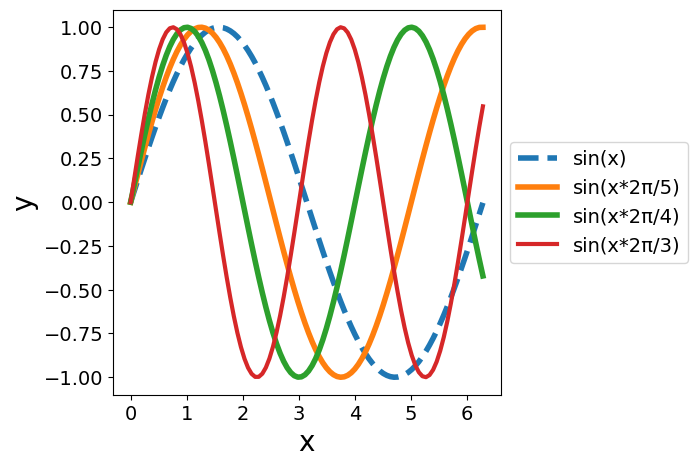

In [ ]:
x = np.linspace(0, 2*3.14, 100)
y = np.sin(x)
y2 = np.sin(x*2*3.14/5)
y3 = np.sin(x*2*3.14/4)
y4 = np.sin(x*2*3.14/3)

plot_list = [
    ([x, y], {"label": "sin(x)", "linestyle": "dashed"}),
    ([x, y2], {"label": "sin(x*2π/5)"}),
    ([x, y3], {"label": "sin(x*2π/4)"}),
    ([x, y4], {"label": "sin(x*2π/3)", "linewidth": 3}),
]

mpl_wrapper(plot_list, xlabel="x", ylabel="y")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()